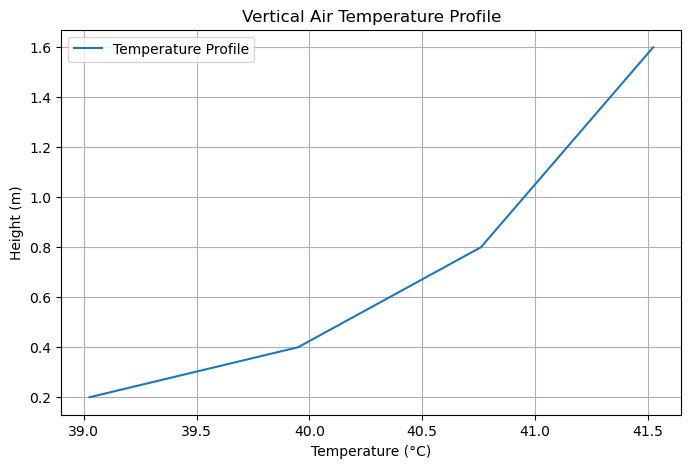

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def air_temperature_profile(z, T0, H, rho_cp, u_star, zH, d):
    """
    Calculate air temperature at height z.

    Parameters:
    - z: Height above ground (m)
    - T0: Aerodynamic surface temperature (°C)
    - H: Sensible heat flux (W/m²)
    - rho_cp: Volumetric specific heat of air (J/m³·K)
    - u_star: Friction velocity (m/s)
    - zH: Roughness parameter for heat transfer (m)
    - d: Zero-plane displacement height (m)

    Returns:
    - Temperature at height z (°C)
    """
    return T0 + (H / (0.4 * rho_cp * u_star)) * np.log((z - d) / zH)

# Example parameters
z = np.array([0.2, 0.4, 0.8, 1.6])  # Heights (m)
T0 = 34.6  # Surface temperature (°C)
H = 100  # Sensible heat flux (W/m²)
rho_cp = 1200  # Volumetric specific heat of air (J/m³·K)
u_star = 0.2  # Friction velocity (m/s)
zH = 0.002  # Roughness parameter (m)
d = 0.06  # Zero-plane displacement (m)

T = air_temperature_profile(z, T0, H, rho_cp, u_star, zH, d)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(T, z, label="Temperature Profile")
plt.xlabel("Temperature (°C)")
plt.ylabel("Height (m)")
plt.title("Vertical Air Temperature Profile")
plt.legend()
plt.grid()
plt.show()


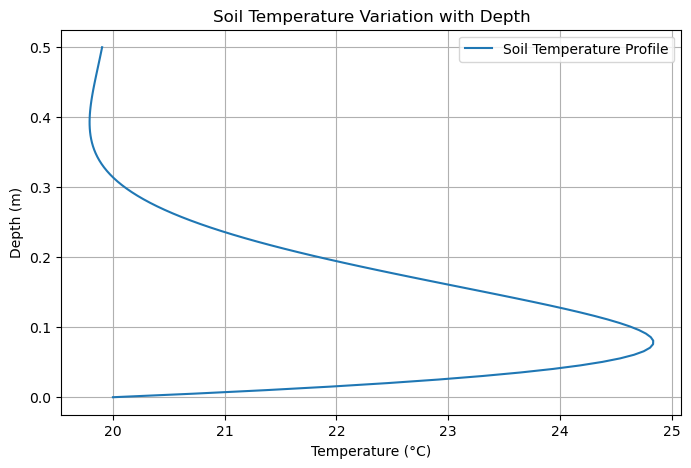

In [2]:
def soil_temperature(z, t, T_ave, A0, D, omega):
    """
    Calculate soil temperature at depth z and time t.

    Parameters:
    - z: Depth (m)
    - t: Time (hours)
    - T_ave: Average soil surface temperature (°C)
    - A0: Amplitude of surface temperature fluctuation (°C)
    - D: Damping depth (m)
    - omega: Angular frequency (rad/hour)

    Returns:
    - Soil temperature (°C)
    """
    return T_ave + A0 * np.exp(-z / D) * np.sin(omega * t - z / D)

# Example parameters
z = np.linspace(0, 0.5, 100)  # Depths (m)
t = 12  # Noon (hours)
T_ave = 20  # Mean temperature (°C)
A0 = 15  # Surface temperature fluctuation amplitude (°C)
D = 0.1  # Damping depth (m)
omega = np.pi / 12  # Angular frequency (rad/hour)

T_soil = soil_temperature(z, t, T_ave, A0, D, omega)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(T_soil, z, label="Soil Temperature Profile")
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.title("Soil Temperature Variation with Depth")
plt.legend()
plt.grid()
plt.show()


In [3]:
def thermal_time(Tx, Tn, Tb, dt=1):
    """
    Calculate thermal time for a day.

    Parameters:
    - Tx: Maximum daily temperature (°C)
    - Tn: Minimum daily temperature (°C)
    - Tb: Base temperature (°C)
    - dt: Time increment (days)

    Returns:
    - Thermal time (day-degrees)
    """
    avg_temp = (Tx + Tn) / 2
    if avg_temp > Tb:
        return (avg_temp - Tb) * dt
    return 0

# Example usage
daily_temps = [(20, 10), (22, 12), (18, 9)]  # (Tx, Tn) pairs
Tb = 5  # Base temperature (°C)

thermal_times = [thermal_time(Tx, Tn, Tb) for Tx, Tn in daily_temps]
print("Thermal Times (day-degrees):", thermal_times)


Thermal Times (day-degrees): [10.0, 12.0, 8.5]


In [4]:
# Weather data (day, Tx, Tn)
weather_data = [
    (119, 5.0, -0.6), (120, 11.7, 1.7), (121, 21.1, 4.4),
    # Add additional rows from the table...
]

Tb = 3.0  # Base temperature (°C)
thermal_requirement = 900  # Day-degrees for flowering

# Calculate cumulative thermal time
cumulative_thermal_time = 0
for day, Tx, Tn in weather_data:
    cumulative_thermal_time += thermal_time(Tx, Tn, Tb)
    if cumulative_thermal_time >= thermal_requirement:
        print(f"Flowering occurs on day {day}")
        break
